<p style="color: white; font-size: 3rem; font-weight: bold; background-color: lightcoral; text-align: center">
    PREPARACIÓN Y ANÁLISIS DE DATOS 
</p>

# 1. Creación del ambiente inicial de trabajo
Se realizan las importaciones necesarias para este paso y se cargan los datos. Imprimiremos también en pantalla información básica sobre el dataset.

In [24]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np

# Cargar los datos
df = pd.read_csv(r'../data/1_interim/database_rg.csv')

# Mostrar información básica del DataFrame
print("Primeras 5 filas del DataFrame:")
print(df.head())
print("\nInformación del DataFrame:")
print(df.info())

Primeras 5 filas del DataFrame:
        Fecha  Total  HechosSimples HechosMortales Victimas  \
0  01/01/2009    157            154              0        0   
1  02/01/2009    178            176              0        0   
2  03/01/2009    267            250              2        2   
3  04/01/2009    217            202              1        1   
4  05/01/2009    233            225              0        0   

   HechosConLesiones  Lesionados  HechosUrbanos HechosRurales  
0                  3           3            149             8  
1                  2           2            166            12  
2                 15          15            259             8  
3                 14          13            209             8  
4                  8          10            224             9  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --

Se puede observar que existen variables categóricas en campos que deberían ser solo numéricos. Cuando tenemos campos que deberían ser numéricos pero son detectados como 'object' (string), hay varias formas de investigar los valores problemáticos. 

**unique():**

Rápido vistazo a todos los valores posibles. Útil para detectar errores obvios como espacios extras, símbolos extraños

**to_numeric() con manejo de errores:**

Identifica exactamente qué filas tienen problemas. Útil para localizar dónde están los errores.

**value_counts():**

Muestra la frecuencia de cada valor. Útil para detectar valores atípicos o poco frecuentes

**Verificación de tipos específicos:**

Muestra el tipo exacto de cada valor. Útil para detectar inconsistencias en los tipos de datos

---

Siempre comenzaremos con *unique()* para tenr una visión general. 

In [25]:
columnas_object = df.select_dtypes(include=['object']).columns
for columna in columnas_object:
    print(f"\n{columna}:")
    print(df[columna].unique())


Fecha:
['01/01/2009' '02/01/2009' '03/01/2009' '04/01/2009' '05/01/2009'
 '06/01/2009' '07/01/2009' '08/01/2009' '09/01/2009' '10/01/2009'
 '11/01/2009' '12/01/2009' '01/01/2010' '02/01/2010' '03/01/2010'
 '04/01/2010' '05/01/2010' '06/01/2010' '07/01/2010' '08/01/2010'
 '09/01/2010' '10/01/2010' '11/01/2010' '12/01/2010' '01/01/2011'
 '02/01/2011' '03/01/2011' '04/01/2011' '05/01/2011' '06/01/2011'
 '07/01/2011' '08/01/2011' '09/01/2011' '10/01/2011' '11/01/2011'
 '12/01/2011' '01/01/2012' '02/01/2012' '03/01/2012' '04/01/2012'
 '05/01/2012' '06/01/2012' '07/01/2012' '08/01/2012' '09/01/2012'
 '10/01/2012' '11/01/2012' '12/01/2012' '01/01/2013' '02/01/2013'
 '03/01/2013' '04/01/2013' '05/01/2013' '06/01/2013' '07/01/2013'
 '08/01/2013' '09/01/2013' '10/01/2013' '11/01/2013' '12/01/2013'
 '01/01/2014' '02/01/2014' '03/01/2014' '04/01/2014' '05/01/2014'
 '06/01/2014' '07/01/2014' '08/01/2014' '09/01/2014' '10/01/2014'
 '11/01/2014' '12/01/2014' '01/01/2015' '02/01/2015' '03/01/2015'
 '

Vemos entonces, que los campos que deberían ser de tipo numéricos son de tipo caracter a causa de algunos datos con valor "-". En el caso de las fechas, todas tienen el valor correcto, pero hay que convertirlas de "Object" a "Date".

En el caso de que la variable numérica sea de tipo continua, no nos serviría de mucho, ya que alargaría demasiado la salida por pantalla, por lo que utilizaríamos *"to_numeric()"*

In [26]:
def encontrar_no_numericos(df, columna):
    # Intentar convertir a numérico y ver qué filas fallan
    errores = pd.to_numeric(df[columna], errors='coerce').isna()
    if errores.any():
        print(f"\nValores no numéricos en {columna}:")
        print(df.loc[errores, columna].unique())
        print(f"Filas con valores no numéricos:")
        print(df[errores].index.tolist())
    return errores.sum()

print("\n2. Búsqueda de valores no numéricos:")
for columna in ['HechosMortales', 'Victimas', 'HechosRurales']:
    n_errores = encontrar_no_numericos(df, columna)
    print(f"Total de valores no numéricos en {columna}: {n_errores}")



2. Búsqueda de valores no numéricos:

Valores no numéricos en HechosMortales:
['-']
Filas con valores no numéricos:
[60, 64, 65, 67, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 85, 88, 89, 90, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 125, 127, 129, 130, 131, 144, 145, 146, 147, 148, 149, 150, 152, 154, 155, 157, 158, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174]
Total de valores no numéricos en HechosMortales: 72

Valores no numéricos en Victimas:
['-']
Filas con valores no numéricos:
[60, 63, 64, 65, 67, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 83, 85, 88, 89, 90, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 125, 127, 129, 130, 131, 144, 145, 146, 147, 148, 149, 150, 152, 154, 155, 157, 158, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174]
Total de valores no numéricos en Victimas: 72

Valores no numéricos en HechosRural

Esto nos deja un panorama mas claro de que el unico valor que no nos deja convertir los datos a tipo numérico son "-". También nos indica en cuantas filas (y cuales) existe este caracter.

---

# 1. Imputación de valores
En este caso, no sería correcto usar técnicas de imputación como media o mediana, ya que el "-" no representa datos faltantes sino ausencia de eventos. Lo más apropiado sería reemplazar estos "-" por 0.

In [27]:
# 1. Convertir los '-' a 0 y transformar a numérico
columnas_a_limpiar = ['HechosMortales', 'Victimas', 'HechosRurales']
df[columnas_a_limpiar] = df[columnas_a_limpiar].replace('-', 0)

# Convertir a tipo numérico
for columna in columnas_a_limpiar:
    df[columna] = pd.to_numeric(df[columna])


Convertimos los campos de fecha actuamente de tipo Object a tipo Date y mostramos los resultados en pantalla.

In [28]:
# 2. Convertir la columna Fecha a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Verificar los cambios
print("Tipos de datos después de la limpieza:")
print(df.info())

Tipos de datos después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              176 non-null    datetime64[ns]
 1   Total              176 non-null    int64         
 2   HechosSimples      176 non-null    int64         
 3   HechosMortales     176 non-null    int64         
 4   Victimas           176 non-null    int64         
 5   HechosConLesiones  176 non-null    int64         
 6   Lesionados         176 non-null    int64         
 7   HechosUrbanos      176 non-null    int64         
 8   HechosRurales      176 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 12.5 KB
None


Una vez teniéndo el dataframe sin errores en los tipos de datos, podemos comenzar por:

# Análisis Exploratorio de Datos (EDA)
Para ello importaremos las bibliotecas de visualización y reaizamos unas estadísticas descriptivas básicas

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.describe())

                               Fecha       Total  HechosSimples  \
count                            176  176.000000     176.000000   
mean   2015-11-09 16:54:32.727272704  160.329545     140.937500   
min              2009-01-01 00:00:00    9.000000       6.000000   
25%              2012-01-08 18:00:00   58.000000      40.000000   
50%              2016-01-04 12:00:00  121.000000      97.000000   
75%              2019-04-10 12:00:00  241.000000     226.250000   
max              2023-01-08 00:00:00  457.000000     445.000000   
std                              NaN  114.603039     115.239584   

       HechosMortales    Victimas  HechosConLesiones  Lesionados  \
count      176.000000  176.000000         176.000000  176.000000   
mean         0.380682    0.465909          19.011364   27.988636   
min          0.000000    0.000000           2.000000    2.000000   
25%          0.000000    0.000000          14.000000   19.000000   
50%          0.000000    0.000000          18.000000   2

Veamos una evolución temporal del total de accidentes en un gráfico de lineas

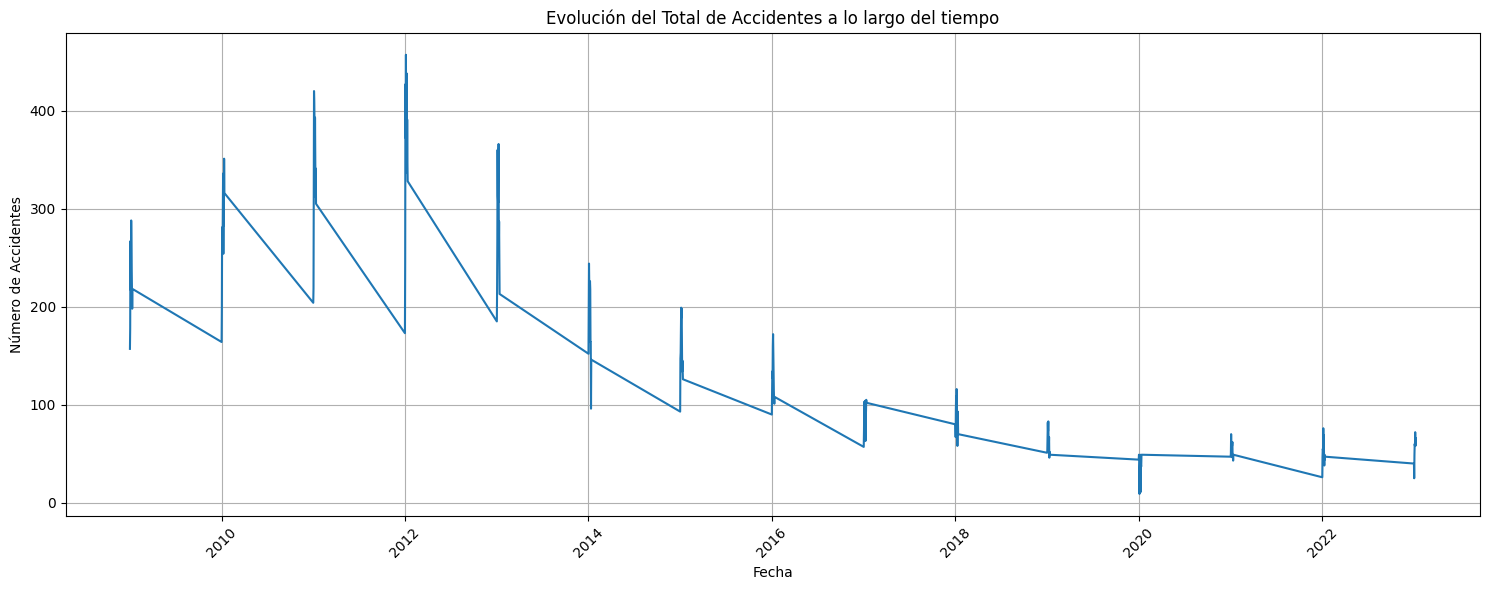

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(df['Fecha'], df['Total'])
plt.title('Evolución del Total de Accidentes a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Veremos también la distribución de los accidentes con un gráfico de tortas

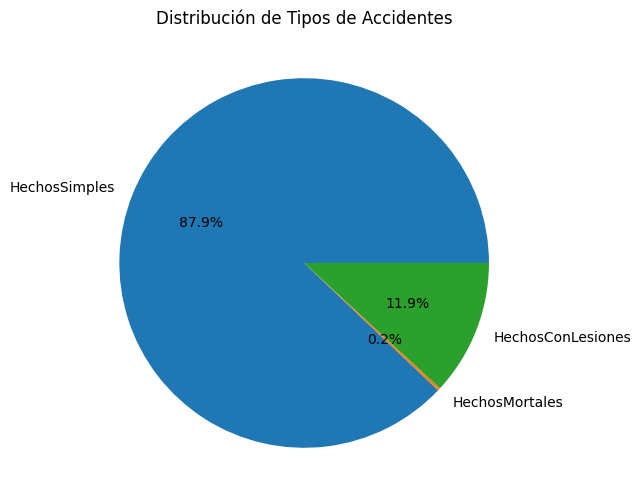

In [31]:
df_tipos = df[['HechosSimples', 'HechosMortales', 'HechosConLesiones']].sum()
plt.figure(figsize=(8, 6))
plt.pie(df_tipos, labels=df_tipos.index, autopct='%1.1f%%')
plt.title('Distribución de Tipos de Accidentes')
plt.show()

Veamos si encontramos una correlación entre variables, con principal interés en los hechos rurales/ urbanos, para ayudarnos a predecir los acontecimientos mas adelante.

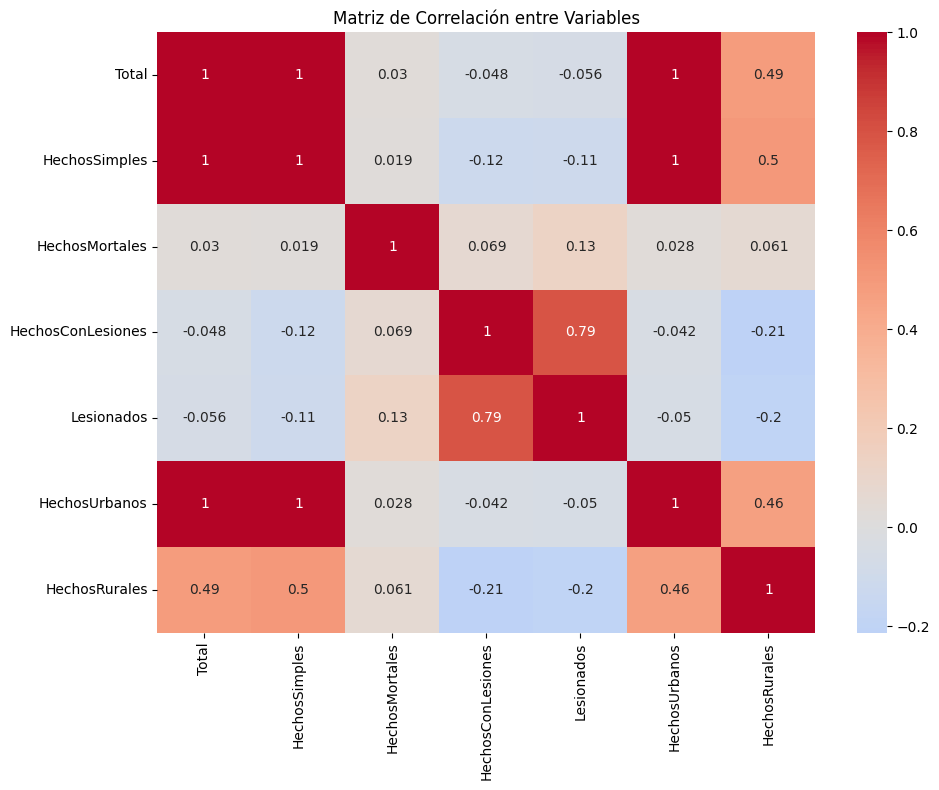

In [32]:
matriz_correlacion = df[['Total', 'HechosSimples', 'HechosMortales', 
                        'HechosConLesiones', 'Lesionados', 
                        'HechosUrbanos', 'HechosRurales']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()

Vemos una clara relación fuerte entre los hechos con lesiones y los lesionados, por la la naturaleza de los datoss. Observamos una relación muy fuerte entre total y hechos simples, por lo que podemos decir que la mayoría de hechos son de tipo simple; esto lo podemos corroborar con el diagrama de torta anterior. La correlación entre total y hechos urbanos sugiere que la mayoría de los accidentes ocurren en zonas urbanas.

Correlaciones moderadas:
HechosRurales con Total (0.49), HechosSimples (0.5) y HechosUrbanos (0.46): Indica una relación moderada positiva.

Este análisis sugiere que los accidentes son predominantemente urbanos y la mayoría son hechos simples. Los hechos mortales parecen ocurrir de manera independiente a otros tipos de accidentes

---

Es importante analizar los outliers para el modelo de aprendizaje automático, por lo que realizaremos algunas visualizaciones para predecir que hacer con los mismos, por lo que debemos considerar si:

- ¿Son errores de datos?

- ¿Son eventos excepcionales pero reales (como accidentes masivos)?

- ¿Siguen algún patrón temporal (ej: más accidentes en ciertos períodos)?

## Boxplot.
Realizamos un boxplot para visualizar outliers en todas las variables.

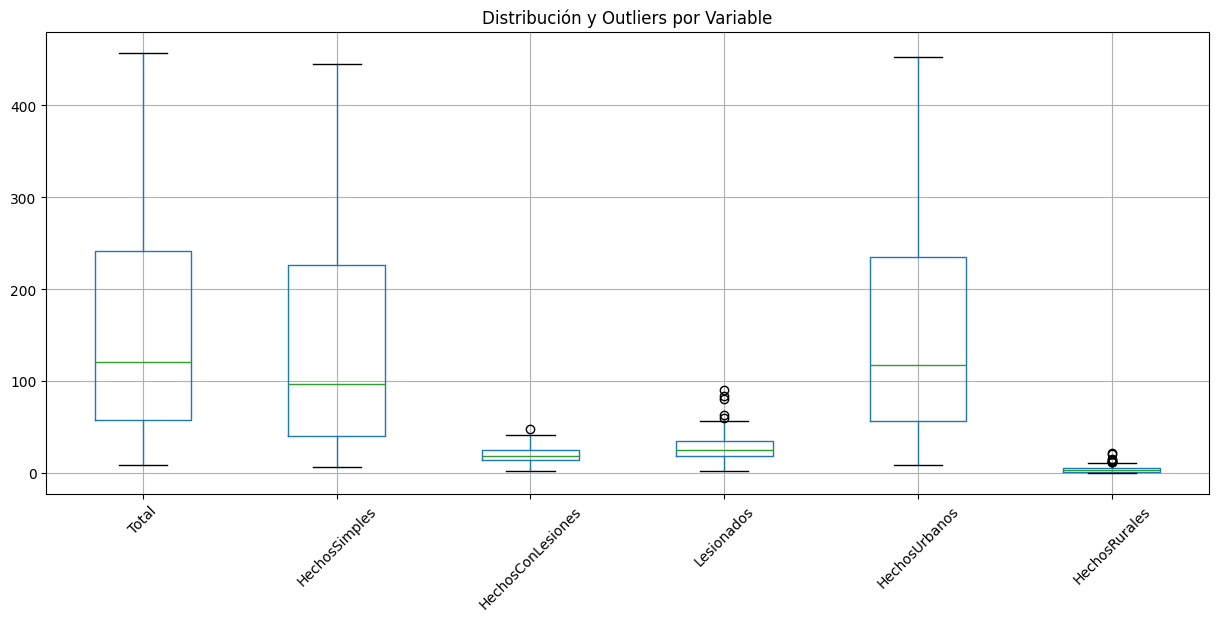

In [33]:
plt.figure(figsize=(15, 6))
df.boxplot(column=['Total', 'HechosSimples', 'HechosConLesiones', 'Lesionados', 'HechosUrbanos', 'HechosRurales'])
plt.title('Distribución y Outliers por Variable')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Análisis estadistico de outliers:

In [34]:
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    print(f"\nOutliers en {columna}:")
    print(f"Número de outliers: {len(outliers)}")
    if len(outliers) > 0:
        print("Valores outliers:")
        print(outliers[['Fecha', columna]].sort_values(by=columna, ascending=False))
        print(f"Límite inferior: {limite_inferior:.2f}")
        print(f"Límite superior: {limite_superior:.2f}")
    return outliers

variables = ['Total', 'HechosSimples', 'HechosConLesiones', 'Lesionados', 'HechosUrbanos', 'HechosRurales']

for var in variables:
    detectar_outliers(df, var)


Outliers en Total:
Número de outliers: 0

Outliers en HechosSimples:
Número de outliers: 0

Outliers en HechosConLesiones:
Número de outliers: 1
Valores outliers:
         Fecha  HechosConLesiones
110 2018-01-03                 48
Límite inferior: -2.50
Límite superior: 41.50

Outliers en Lesionados:
Número de outliers: 5
Valores outliers:
         Fecha  Lesionados
88  2016-01-05          90
55  2013-01-08          84
124 2019-01-05          81
107 2017-01-12          63
83  2015-01-12          60
Límite inferior: -5.00
Límite superior: 59.00

Outliers en HechosUrbanos:
Número de outliers: 0

Outliers en HechosRurales:
Número de outliers: 9
Valores outliers:
        Fecha  HechosRurales
25 2011-01-02             22
24 2011-01-01             21
34 2011-01-11             15
12 2010-01-01             14
23 2010-01-12             13
1  2009-01-02             12
13 2010-01-02             12
14 2010-01-03             12
37 2012-01-02             12
Límite inferior: -5.00
Límite superior: 1

Según las métricas descriptivas, los outliers parecen ser eventos reales, mas viendo que hay una concentración temporal de outliers en ciertos periodos.

Puedo mantener los outliers porque podrían representar patrones importantes (Ej: Mas accidentes en verano), pero dada la naturaleza del modelo, voy a tratarlo con una técnica de modelado robusta como randomforest, para adecuar los valores a algo mas consistente, manteniendo la veracidad en los datos.

---

# Manejo de Outliers: Random Forest
Comenzamos importando las bibliotecas necesarias y preparando las características temporales.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month

Seleccionamos las características y los objetivos

In [36]:
features = ['Año', 'Mes', 'HechosSimples', 'HechosMortales', 'HechosConLesiones', 
           'Lesionados', 'HechosUrbanos', 'HechosRurales']
target = 'Total'

X = df[features]
y = df[target]

Dividimos los datos en conjuntos de entrenamiento y prueba, y creamos y entrenamos el modelo

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Hacemos predicciones, evaluamos el modelo y evaluamos el rendimiento del mismo.

In [38]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Métricas de rendimiento del modelo:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Métricas de rendimiento del modelo:
RMSE: 7.17
R2 Score: 1.00


Evaluamos la importancia de las características


Importancia de las características:
      caracteristica  importancia
6      HechosUrbanos     0.664918
2      HechosSimples     0.333608
4  HechosConLesiones     0.000479
5         Lesionados     0.000366
0                Año     0.000301
7      HechosRurales     0.000254
3     HechosMortales     0.000073
1                Mes     0.000000


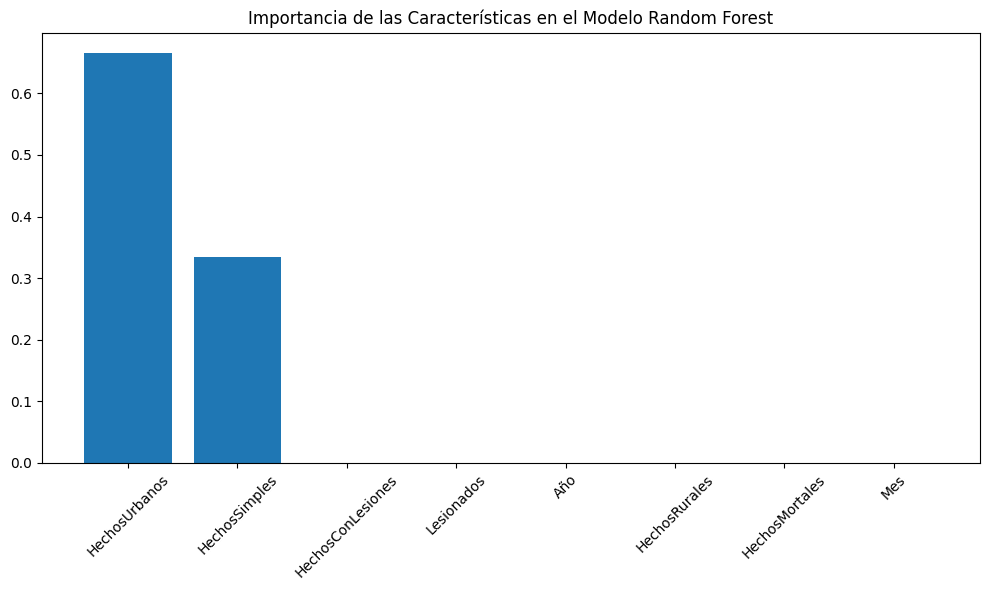

In [39]:
importancia = pd.DataFrame({
    'caracteristica': features,
    'importancia': rf_model.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

print("\nImportancia de las características:")
print(importancia)

plt.figure(figsize=(10, 6))
plt.bar(importancia['caracteristica'], importancia['importancia'])
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los outliers los encontramos en HechosConLesiones, Lesionados y HechosRurales. Random Forest nos puede ayudar a imputar valores más razonables para estos casos. 

- Identificaremos los outliers usando el método IQR.

- Para cada variable con outliers:

    - Entrena un modelo RF usando los datos sin outliers

    - Predice nuevos valores para los outliers

    - Reemplaza los valores originales con las predicciones

- Mostraremos una comparación entre los valores originales e imputados

- Verificaremos que no hayan outliers

- Visualizaremos la nueva distribución


Imputación para HechosConLesiones:
         Fecha  Valor_Original  Valor_Imputado
110 2018-01-03              48              25

Imputación para Lesionados:
         Fecha  Valor_Original  Valor_Imputado
55  2013-01-08              84              43
83  2015-01-12              60              36
88  2016-01-05              90              44
107 2017-01-12              63              44
124 2019-01-05              81              37

Imputación para HechosRurales:
        Fecha  Valor_Original  Valor_Imputado
1  2009-01-02              12               7
12 2010-01-01              14               6
13 2010-01-02              12               6
14 2010-01-03              12               6
23 2010-01-12              13               7
24 2011-01-01              21               7
25 2011-01-02              22               7
34 2011-01-11              15               6
37 2012-01-02              12               5

Verificación final de outliers:
Outliers en HechosConLesiones desp

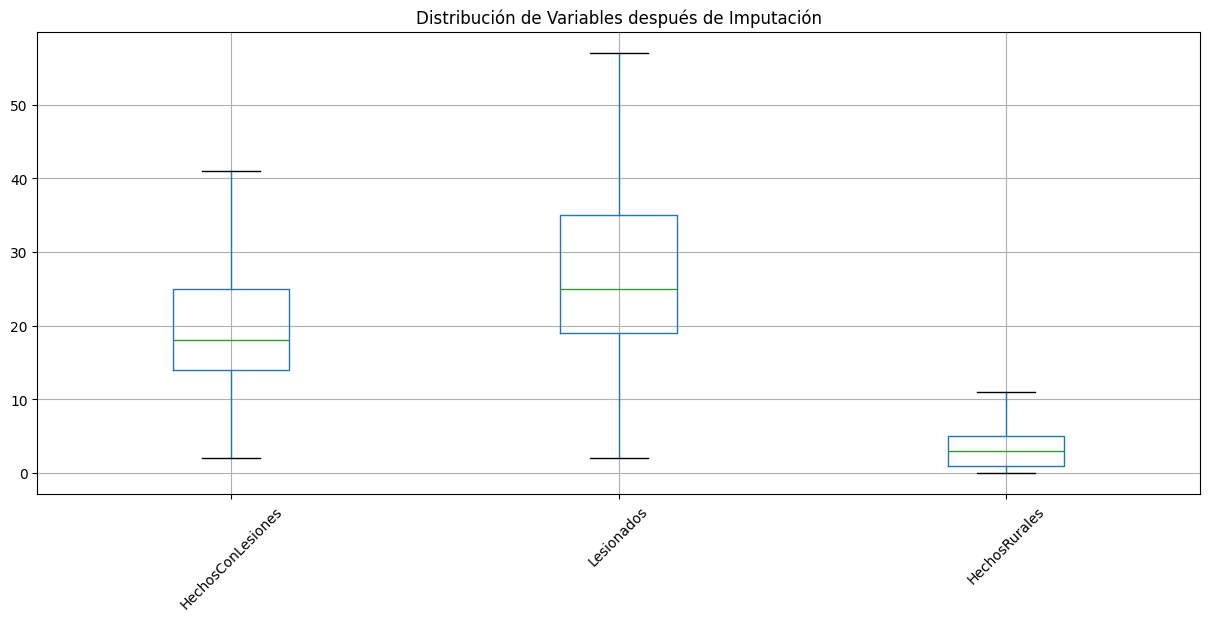


Verificación de valores enteros:
Valores no enteros en HechosConLesiones: 0
Valores no enteros en Lesionados: 0
Valores no enteros en HechosRurales: 0


In [40]:
# 1. Función para identificar outliers usando IQR
def get_outliers_mask(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (df[columna] < limite_inferior) | (df[columna] > limite_superior)

# 2. Función para entrenar RF y predecir valores enteros
def predict_values_rf(df, columna_target, features):
    # Crear copia del dataframe
    df_temp = df.copy()
    
    # Identificar outliers
    outliers_mask = get_outliers_mask(df, columna_target)
    
    if outliers_mask.sum() > 0:
        # Separar datos sin outliers para entrenamiento
        df_train = df_temp[~outliers_mask]
        
        # Preparar datos de entrenamiento
        X_train = df_train[features]
        y_train = df_train[columna_target]
        
        # Entrenar modelo
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        
        # Predecir valores para outliers y redondear al entero más cercano
        outliers_indices = df_temp[outliers_mask].index
        X_outliers = df_temp.loc[outliers_mask, features]
        predicted_values = np.round(rf.predict(X_outliers))  # Redondear a enteros
        
        return outliers_indices, predicted_values.astype(int)  # Convertir a enteros
    
    return None, None

# 3. Imputar outliers para cada columna
columnas_con_outliers = ['HechosConLesiones', 'Lesionados', 'HechosRurales']

# Features para cada predicción (excluyendo la variable objetivo y Total)
features_base = ['Año', 'Mes', 'HechosSimples', 'HechosMortales']

for columna in columnas_con_outliers:
    # Crear lista de features específica para cada columna
    features_especificos = features_base + [f for f in columnas_con_outliers if f != columna]
    
    # Obtener predicciones
    indices, valores = predict_values_rf(df, columna, features_especificos)
    
    if indices is not None:
        # Guardar valores originales
        valores_originales = df.loc[indices, columna].copy()
        
        # Imputar nuevos valores
        df.loc[indices, columna] = valores
        
        # Mostrar comparación
        print(f"\nImputación para {columna}:")
        comparacion = pd.DataFrame({
            'Fecha': df.loc[indices, 'Fecha'],
            'Valor_Original': valores_originales,
            'Valor_Imputado': valores
        })
        comparacion = comparacion.sort_values('Fecha')  # Ordenar por fecha
        print(comparacion)

# 4. Verificar que ya no hay outliers
print("\nVerificación final de outliers:")
for columna in columnas_con_outliers:
    outliers = get_outliers_mask(df, columna).sum()
    print(f"Outliers en {columna} después de imputación: {outliers}")

# 5. Visualizar distribución después de imputación
plt.figure(figsize=(15, 6))
df.boxplot(column=columnas_con_outliers)
plt.title('Distribución de Variables después de Imputación')
plt.xticks(rotation=45)
plt.show()

# 6. Verificar que todos los valores son enteros
print("\nVerificación de valores enteros:")
for columna in columnas_con_outliers:
    no_enteros = df[~df[columna].apply(lambda x: float(x).is_integer())].shape[0]
    print(f"Valores no enteros en {columna}: {no_enteros}")

Importante aclarar redondear los valores imputados, para que los datos tengan sentido.

---

# Exportación de DF a CSV.

In [43]:
df.to_csv('../data/2_processed/database_rg_clean.csv', index=False)

print("Verificación de la exportación:")
print(f"Número de filas exportadas: {len(df)}")
print(f"Número de columnas exportadas: {len(df.columns)}")
print("\nColumnas exportadas:")
for col in df.columns:
    print(f"- {col}")

Verificación de la exportación:
Número de filas exportadas: 176
Número de columnas exportadas: 11

Columnas exportadas:
- Fecha
- Total
- HechosSimples
- HechosMortales
- Victimas
- HechosConLesiones
- Lesionados
- HechosUrbanos
- HechosRurales
- Año
- Mes
